# Bike highways - revisit manually

After AWS and PyCaret it's still nice to do a bit of predicting ourselves. Let's load the same dataset (again) and see of any of the models we saw will be able to provide a good prediction.

In [11]:
import pandas as pd

df = pd.read_csv('files/bike_counters_data/Measured data-nl-Geel_FMN GV 21 Geel.csv')

df["date_time"] = df["Datum"] + " " + df["Tijd"]
df["date_time"] = pd.to_datetime(df["date_time"])
df = df.set_index("date_time")
df = df[["Aantal fietsers"]]
df.head()

,Aantal fietsers
date_time,
2020-02-14 00:00:00,0
2020-02-14 01:00:00,0
2020-02-14 02:00:00,0
2020-02-14 03:00:00,2
2020-02-14 04:00:00,0


First, group by month and plot the data.

<Axes: xlabel='date_time'>

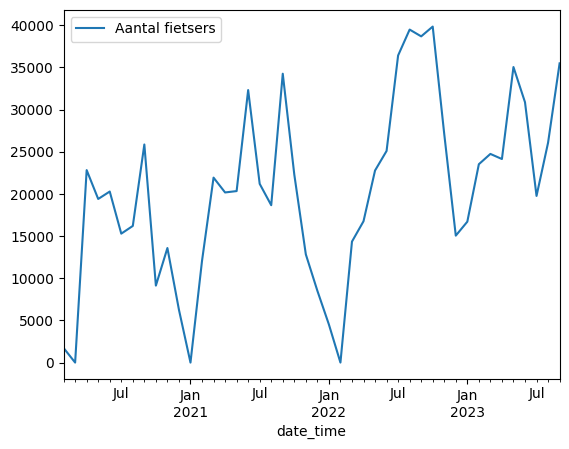

In [13]:
df_time_month = df.loc[ df["Aantal fietsers"] >= 30 ].resample('M').sum().reset_index().set_index(['date_time'])
df_time_month.plot()

Next, calculate the autocorrection on this dataset. This should show us any seasonality that is in there.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

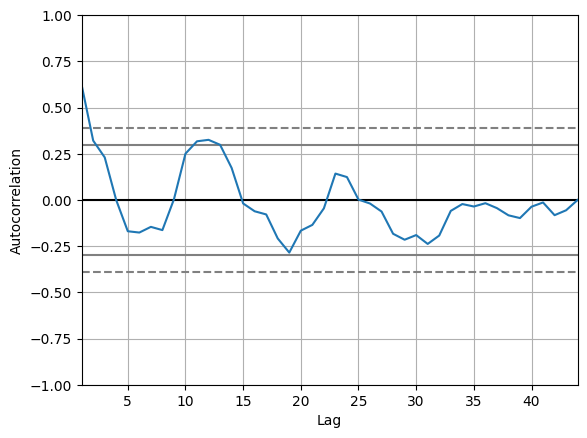

In [14]:
# Up to you!



It's not as obvious as the example dataset, but there is a definite spike at 12 and 24 (months). And this is significant because we only have three years worth of data.

What is we group the data by day?

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

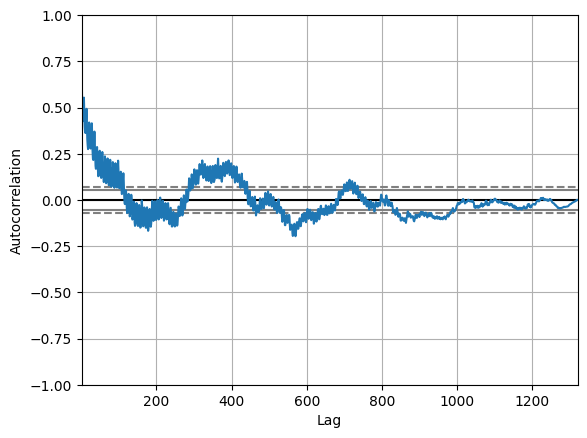

In [16]:
df_time_day = df.loc[ df["Aantal fietsers"] >= 30 ].resample('D').sum().reset_index().set_index(['date_time'])
# df_time_day.plot()
pd.plotting.autocorrelation_plot(df_time_day['Aantal fietsers'])

The same spike at 365 and 730! But not much higher, so we could simply keep on working with the monthly data...

## Arima

* [Try this one](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)
* [Or this one](https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/)

Both require the statsmodel package to check for stationarity. You can install it using pip.